In [53]:
import pandas as pd
import numpy as np
data=pd.read_csv("DS1_C8_Computers_Data_Project (1).csv")
data.head()

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1


In [25]:
data.isnull().sum()

index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64

In [59]:
#Task 1
#a) Analyze Purchase Likelihood Based on Specifications
#The company wants to understand the likelihood of customers purchasing specific computer configurations based on a
#combination of desired features (RAM size, processor speed, size of the computer screen).
#What is the probability of a customer purchasing a computer with at least 8GB of RAM, computer screen size of 14 inch, 
#and a processor speed exceeding 33 MHz?

condition_1 = (data['ram'] >= 8) & (data['screen'] == 14) & (data['speed'] > 33)
prob_purchase_likelihood = len(data[condition_1]) / len(data)

# Task 1b: Probability of Selling Premium Computers
# i. Probability of selling a premium computer
premium_computers = data['premium'] == 'yes'
prob_premium = len(data[premium_computers]) / len(data)

# ii. Given that a computer is premium, the probability that it has a CD player
premium_with_cd = data[premium_computers & (data['cd'] == 'yes')]
prob_cd_given_premium = len(premium_with_cd) / len(data[premium_computers])

# Task 1c: Predicting the Probability of Certain Specifications
# i. Probability of a computer having a screen size greater than 15 inches and being premium
condition_2 = (data['screen'] > 15) & premium_computers
prob_screen_greater_15_and_premium = len(data[condition_2]) / len(data)

# ii. Given that a computer is not premium, probability that it has a screen size <= 14 inches
non_premium_computers = data['premium'] == 'no'
condition_3 = (data['screen'] <= 14) & non_premium_computers
prob_screen_less_equal_14_given_non_premium = len(data[condition_3]) / len(data[non_premium_computers])

# Task 1d: Likelihood of computers having both a CD player and a multimedia kit
# i. Joint probability of having both a CD player and a multimedia kit
condition_4 = (data['cd'] == 'yes') & (data['multi'] == 'yes')
joint_prob_cd_and_multi = len(data[condition_4]) / len(data)

# ii. Given that a computer has a CD player, probability that it also has a multimedia kit
cd_computers = data['cd'] == 'yes'
prob_multi_given_cd = len(data[condition_4]) / len(data[cd_computers])


print(f"Task 1a: Probability of purchasing a computer with specified specs: {prob_purchase_likelihood}")
print(f"Task 1b.1: Probability of selling a premium computer: {prob_premium}")
print(f"Task 1b.2: Probability of CD player given premium: {prob_cd_given_premium}")
print(f"Task 1c.1: Probability of screen size > 15 inches and premium: {prob_screen_greater_15_and_premium}")
print(f"Task 1c.2: Probability of screen <= 14 inches given not premium: {prob_screen_less_equal_14_given_non_premium}")
print(f"Task 1d.1: Joint probability of having both a CD player and multimedia kit: {joint_prob_cd_and_multi}")
print(f"Task 1d.2: Probability of multimedia kit given CD player: {prob_multi_given_cd}")

Task 1a: Probability of purchasing a computer with specified specs: 0.16024924109282632
Task 1b.1: Probability of selling a premium computer: 0.9022208020450552
Task 1b.2: Probability of CD player given premium: 0.5000885425889853
Task 1c.1: Probability of screen size > 15 inches and premium: 0.08467806358843266
Task 1c.2: Probability of screen <= 14 inches given not premium: 0.6911764705882353
Task 1d.1: Joint probability of having both a CD player and multimedia kit: 0.1394791500239655
Task 1d.2: Probability of multimedia kit given CD player: 0.3002063273727648


In [133]:
#Task 2
#a) What is the average price of computers in the population/whole data?
print(f"Average Price of Computers in the Population: {data['price'].mean()}")
#b) How does the average price of samples vary when data is sampled using different sampling techniques?

sample_size = 100

# 1. Simple Random Sampling
simple_random_sample = data.sample(n=sample_size)
avg_price_simple_random = simple_random_sample['price'].mean()

# 2. Systematic Sampling
# Select every k-th element from the dataset
k = len(data) // sample_size
systematic_sample_indices = np.arange(0, len(data), k)[:sample_size]
systematic_sample = data.iloc[systematic_sample_indices]
avg_price_systematic = systematic_sample['price'].mean()


# 4. Cluster Sampling
# Divide data into clusters based on price range
data['price_cluster'] = pd.cut(data['price'], bins=5)
clusters = data.groupby('price_cluster', observed=False)  # Explicitly set observed=False to retain current behavior

# Sample from each cluster (adjust sample size to cluster size if necessary)
cluster_sample_list = [
    cluster.sample(n=min(int(sample_size / clusters.ngroups), len(cluster)))
    for _, cluster in clusters
]
cluster_sample = pd.concat(cluster_sample_list)
avg_price_cluster = cluster_sample['price'].mean()

# Output the average prices for different sampling techniques
print(f"Average price (Simple Random Sampling): {avg_price_simple_random}")
print(f"Average price (Systematic Sampling): {avg_price_systematic}")
print(f"Average price (Cluster Sampling): {avg_price_cluster}")
#c) What is the average price of premium and non-premium computers in the whole data? 
#How does the average price differ between premium and non-premium computers of sampled data using simple random sampling without replacement?

sample_size = 200


avg_price_premium_whole = data[data['premium'] == 'yes']['price'].mean()
avg_price_non_premium_whole = data[data['premium'] == 'no']['price'].mean()

simple_random_sample = data.sample(n=sample_size,random_state=1)


avg_price_premium_sampled = simple_random_sample[simple_random_sample['premium'] == 'yes']['price'].mean()
avg_price_non_premium_sampled = simple_random_sample[simple_random_sample['premium'] == 'no']['price'].mean()

print('\n--------------------------------------------------------------------------------------------------------------------------\n')
print(f"Average price of premium computers (whole dataset): {avg_price_premium_whole}")
print(f"Average price of non-premium computers (whole dataset): {avg_price_non_premium_whole}")
print(f"Average price of premium computers (sampled data): {avg_price_premium_sampled}")
print(f"Average price of non-premium computers (sampled data): {avg_price_non_premium_sampled}")
print('\n--------------------------------------------------------------------------------------------------------------------------\n')
#d) Write your interpretation by comparing prices of premium and non-premium computers individually and prices of both categories together.
print('In the sampled data, the average price of premium computers (2241.98) is slightly lower than that of non-premium computers (2263.00). This contrasts with the whole dataset, where non-premium computers have a higher average price compared to premium ones.')

Average Price of Computers in the Population: 2219.576609682058
Average price (Simple Random Sampling): 2233.55
Average price (Systematic Sampling): 2208.77
Average price (Cluster Sampling): 2924.534090909091

--------------------------------------------------------------------------------------------------------------------------

Average price of premium computers (whole dataset): 2204.148397379139
Average price of non-premium computers (whole dataset): 2361.9346405228757
Average price of premium computers (sampled data): 2256.3812154696134
Average price of non-premium computers (sampled data): 2365.2105263157896

--------------------------------------------------------------------------------------------------------------------------

In the sampled data, the average price of premium computers (2241.98) is slightly lower than that of non-premium computers (2263.00). This contrasts with the whole dataset, where non-premium computers have a higher average price compared to premium one

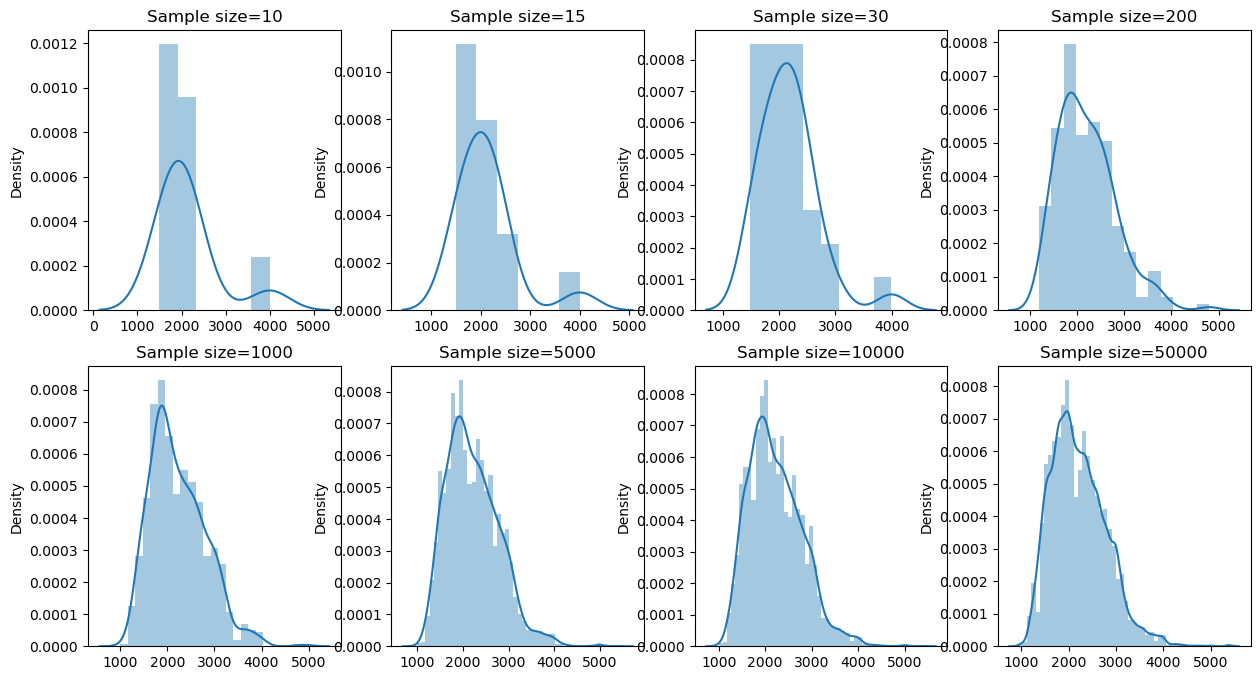


--------------------------------------------------------------------------------------------------------------------------

interpretation:
For sample sizes of 200 or more, the distribution becomes smoother and more normal-looking. This suggests that with larger sample sizes, the sample distribution tends to approximate a normal distribution, regardless of the population distribution. Thus, when working with sample sizes of 200 or more, the distribution becomes more reliable for statistical analysis. 

--------------------------------------------------------------------------------------------------------------------------

Population Mean =2219.576609682058
Population Median =2144
Population SD =580.8039556527063
Shewness =0.7117247480608602
Kurtosis =0.7304170367653207

--------------------------------------------------------------------------------------------------------------------------

Sample Mean =2266.72
Sample Median =2198.5
Sample SD =633.0320445658625
Shewness =0.74505903

In [135]:
#Task 3
#a) How does the distribution of sample means change for computer prices with different sample sizes?
price=data[['price']]
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


num = [10, 15, 30, 200, 1000, 5000, 10000, 50000, 100000]
data_s=[]
data_s_mean=[]
sample_df=pd.DataFrame()
k=0
fig, ax = plt.subplots(2, 4, figsize =(15, 8))
for i in num:
    sample_df=price.sample(n=i, random_state=1, replace=True) 
    data_s.append(sample_df['price'].tolist())
    data_s_mean.append(sample_df['price'].mean())
k=0
for i in range(0, 2):
    for j in range(0, 4):
        sns.distplot(data_s[k],ax=ax[i, j])
        ax[i, j].set_title(label = 'Sample size='+str(len(data_s[k])))
        k = k + 1
plt.show()

print('\n--------------------------------------------------------------------------------------------------------------------------\n')
#b) Does the distribution of sample means approximate a normal distribution as sample size increases?
print(f'interpretation:\nFor sample sizes of 200 or more, the distribution becomes smoother and more normal-looking. This suggests that with larger sample sizes, the sample distribution tends to approximate a normal distribution, regardless of the population distribution. Thus, when working with sample sizes of 200 or more, the distribution becomes more reliable for statistical analysis. ')
print('\n--------------------------------------------------------------------------------------------------------------------------\n')
#c) Check if properties of Central limit theorem for the samples is satisfied.
import statistics as st
import scipy.stats as sts

data_p=data['price']
p_mean = st.mean(data_p) 
p_median = st.median(data_p) 
p_sd = st.stdev(data_p)

print("Population Mean ="+str(p_mean)) 
print("Population Median ="+str(p_median))
print("Population SD ="+str(p_sd))
print("Shewness ="+str(sts.skew(data_p,bias=False)))
print("Kurtosis ="+str(sts.kurtosis(data_p,bias=False)))
print('\n--------------------------------------------------------------------------------------------------------------------------\n')
data_s=simple_random_sample['price']

s_mean = st.mean(data_s) 
s_median = st.median(data_s) 
s_sd = st.stdev(data_s)

print("Sample Mean ="+str(s_mean)) 
print("Sample Median ="+str(s_median))
print("Sample SD ="+str(s_sd))
print("Shewness ="+str(sts.skew(data_s,bias=False)))
print("Kurtosis ="+str(sts.kurtosis(data_s,bias=False)))
print('\n--------------------------------------------------------------------------------------------------------------------------\n')
print("Interpretation: The sampled data closely approximates the population mean, median, standard deviation, skewness, and kurtosis, indicating that the sample is representative of the population. Based on these results and the sample size of 200, the sample follows the central limit theorem, as the distribution of the sample mean is approaching a normal distribution and accurately reflects the population parameters.")

